# Data Visualization

### Setting-up

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import datetime

%run data_cleaning.ipynb

In [2]:
nyc = df1
sao = df2

In [3]:
nyc['tot_duration'] = nyc["out_duration"] + nyc["in_duration"]
sao['tot_duration'] = sao["out_duration"] + sao["in_duration"]

In [4]:
cur_time = datetime.datetime.now()
month = cur_time.strftime('%b')

In [5]:
nyc['date'] = pd.to_datetime(nyc['day_scrap'].astype(str) + ' ' + month + ' ' +nyc['hour_scrap'].astype(str), format='%d %b %H')
nyc['date']= nyc['date'].dt.strftime('%d %b %H h')

In [6]:
sao['date'] = pd.to_datetime(sao['day_scrap'].astype(str) + ' ' + month + ' ' +sao['hour_scrap'].astype(str), format='%d %b %H')
sao['date']= sao['date'].dt.strftime('%d %b %H h')

In [7]:
swiss_air_nyc = nyc.loc[nyc["in_airline_company"] != "Lufthansa"]
lufthansa_air_nyc = nyc.loc[nyc["in_airline_company"] == "Lufthansa"]

In [8]:
swiss_air_sao = sao.loc[sao["in_airline_company"] != "Lufthansa"]
lufthansa_air_sao = sao.loc[sao["in_airline_company"] == "Lufthansa"]

in_airline_company and out_airline_company have the same values for a given row.
To describe either in_airline_company or out_air_line company is the same. This gave us:
* the count (the lenght of the dataframe rows),
* number of unique values (2: Swiss or Lufthansa), 
* the top (the unique value which is the most frequent in the dataframe) and 
* the frequency (which is the number of frequecy of the top).

In [9]:
nyc["in_airline_company"].describe()

count       584
unique        2
top       Swiss
freq        432
Name: in_airline_company, dtype: object

In [10]:
sao["in_airline_company"].describe()

count           572
unique            2
top       Lufthansa
freq            350
Name: in_airline_company, dtype: object

In [11]:
nyc["ticket_price"].describe()

count     584.000000
mean      960.968682
std       163.974908
min       678.720000
25%       816.562500
50%      1049.280000
75%      1074.280000
max      1198.390000
Name: ticket_price, dtype: float64

In [12]:
swiss_air_nyc["ticket_price"].describe()

count     432.000000
mean      904.051065
std       147.355992
min       678.720000
25%       786.880000
50%       910.720000
75%      1059.380000
max      1074.280000
Name: ticket_price, dtype: float64

In [13]:
lufthansa_air_nyc["ticket_price"].describe()

count     152.000000
mean     1122.734539
std        78.893352
min       923.390000
25%      1073.390000
50%      1098.390000
75%      1196.160000
max      1198.390000
Name: ticket_price, dtype: float64

In [14]:
swiss_air_sao["ticket_price"].describe()

count     222.000000
mean     1914.398063
std       128.453898
min      1799.680000
25%      1799.680000
50%      1799.720000
75%      2094.420000
max      2120.290000
Name: ticket_price, dtype: float64

In [15]:
lufthansa_air_sao["ticket_price"].describe()

count     350.000000
mean     1914.812057
std       117.341141
min      1817.900000
25%      1817.900000
50%      1948.600000
75%      1948.600000
max      2215.750000
Name: ticket_price, dtype: float64

## Line Plot

In [16]:
def plot_df(df, month = month):
    test = df.groupby(['day_scrap', 'hour_scrap'])['ticket_price'].agg(['min', 'mean', 'max'])
    test = test.reset_index()
    test['date'] = pd.to_datetime(test['day_scrap'].astype(str) + ' ' + month + ' ' + test['hour_scrap'].astype(str), format='%d %b %H')

    plt.fill_between(test['date'], test['min'], test['max'], alpha=0.3)
    plt.xticks(rotation=90)
    plt.plot(test['date'], test['mean'], "-s")
    plt.ylim(500, 2500)
    # plt.yticks(range(700, 1300, 50))
    plt.xlabel("Date")
    plt.ylabel("Price [€]")

    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %H h'))

    plt.show()

In [17]:
def line_plot(df=nyc):
    plot_data = df[["ticket_price", "tot_duration", "out_airline_company"]]
    sns.lineplot(data=plot_data, x='tot_duration', y='ticket_price', hue='out_airline_company', estimator='mean')

1. Line plots for NYC destination

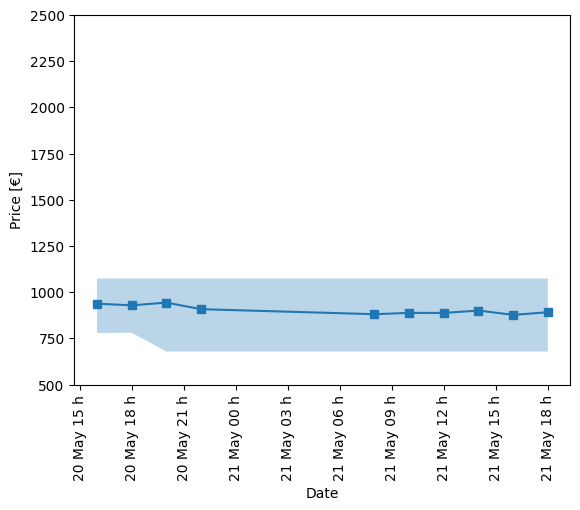

In [20]:
plot_df(df = swiss_air_nyc)

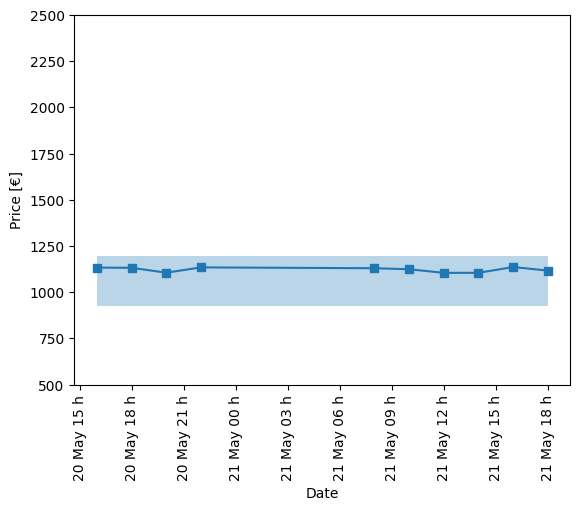

In [21]:
plot_df(df = lufthansa_air_nyc)

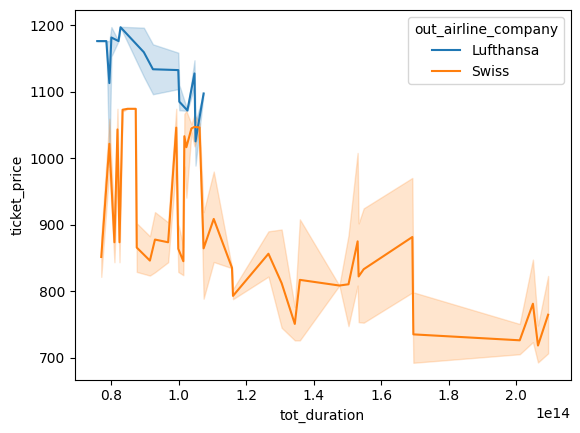

In [22]:
line_plot()

2. Line plots for São Paulo destination

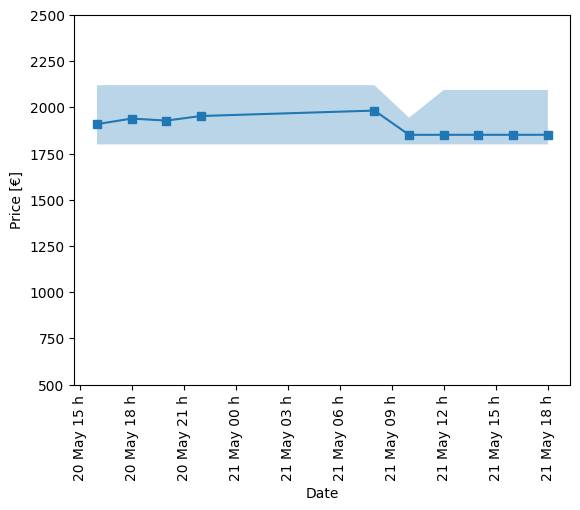

In [23]:
plot_df(df = swiss_air_sao)

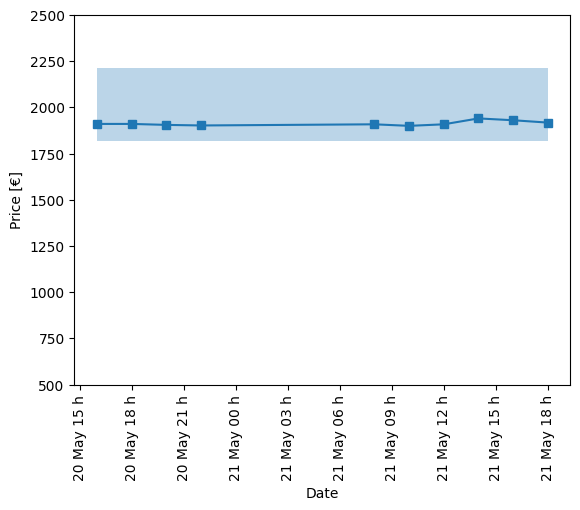

In [24]:
plot_df(df = lufthansa_air_sao)

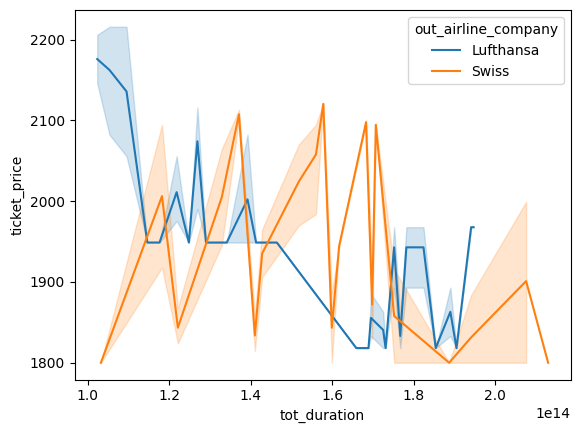

In [25]:
line_plot(sao)

## Bar Chart

In [26]:
def plot_data(df=nyc):
    data = df[["date", "ticket_price", "out_airline_company", "tot_duration"]]
    data = data.sort_values(by='date', ascending = False)

    return data

In [27]:
def bar_chart(plot_data = plot_data()):
    sns.barplot(data = plot_data, x='ticket_price', y='date', hue='out_airline_company',estimator='mean', capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5")

1. NYC

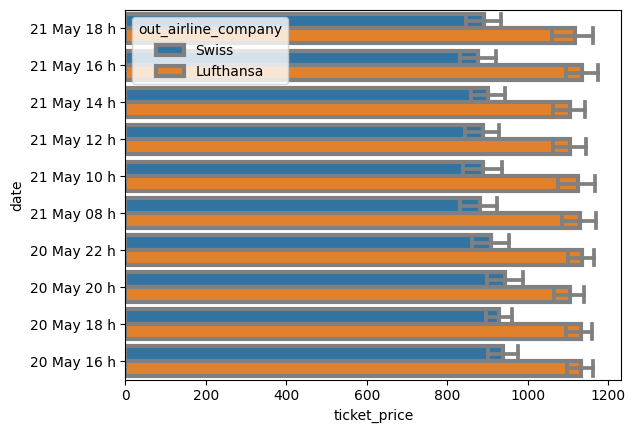

In [28]:
bar_chart(plot_data(nyc))

2. São Paulo

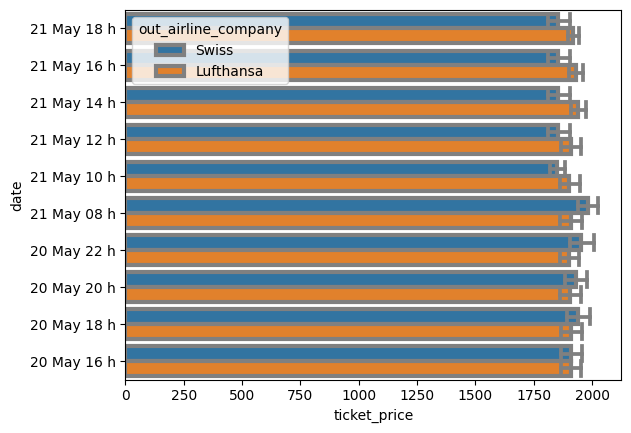

In [29]:
bar_chart(plot_data(sao))

## Scatter Plot

In [30]:
def scatter_plot(data = plot_data()):
    plt.scatter(x=data["ticket_price"], y=data["out_airline_company"])

1. NYC

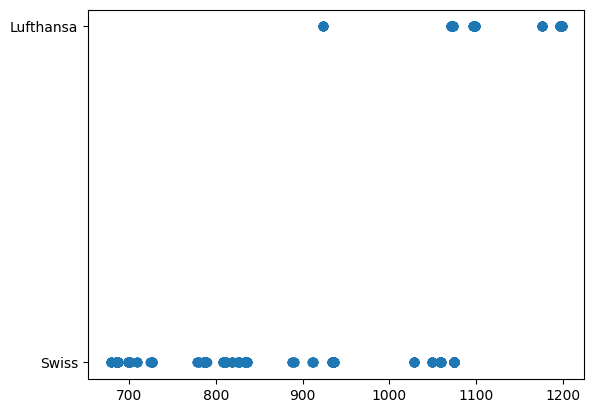

In [31]:
scatter_plot(plot_data(nyc))

2. São Paulo

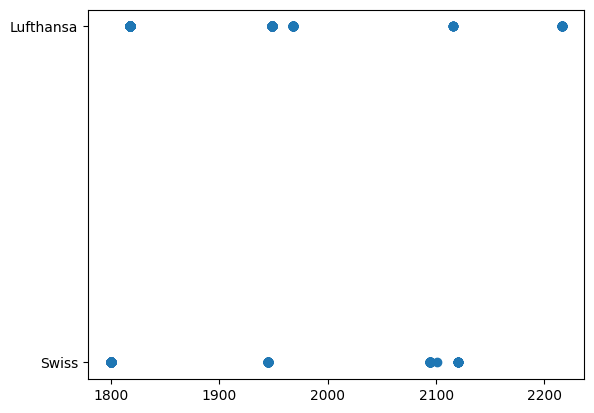

In [32]:
scatter_plot(plot_data(sao))

## Heatmap

In [33]:
def heatmap(data = plot_data()):
    data_pivot = data.pivot_table(index='date', columns='out_airline_company', values='ticket_price', aggfunc='mean')
    data_pivot.sort_index(ascending=False, inplace=True)

    sns.heatmap(data_pivot)

1. NYC

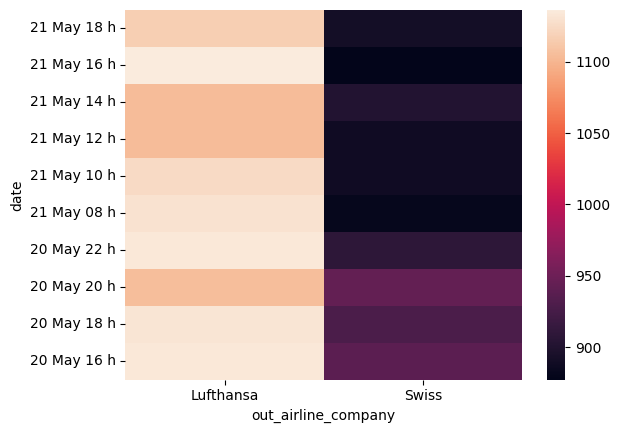

In [34]:
heatmap(plot_data(nyc))

2. Sao

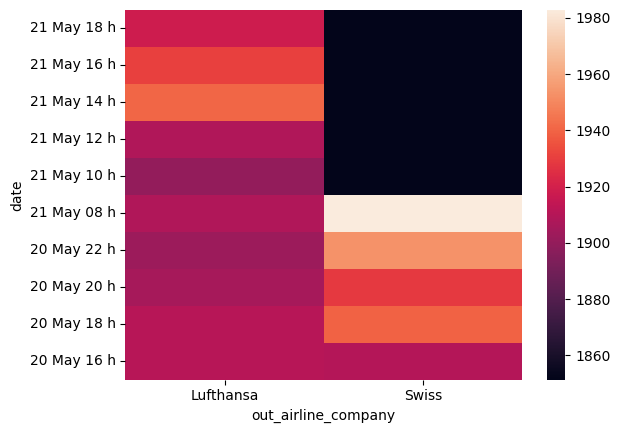

In [35]:
heatmap(plot_data(sao))